## Observations and Insights

## Dependencies and starter code

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mergedData = pd.merge(mouse_metadata,study_results, on=["Mouse ID"], how="outer").groupby('Drug Regimen')

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen
mean = mergedData['Tumor Volume (mm3)'].mean()
median = mergedData['Tumor Volume (mm3)'].median()
variance = mergedData['Tumor Volume (mm3)'].var()
stdDev = mergedData['Tumor Volume (mm3)'].std()
sem = mergedData['Tumor Volume (mm3)'].sem()

sumStat = pd.DataFrame ({"Mean": mean, 
                             "Median" : median,
                             "Variance" : variance,
                             "Standard Deviation" : stdDev,
                             "SEM" : sem})
sumStat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas


Text(0.5, 0, 'Drug Regimen')

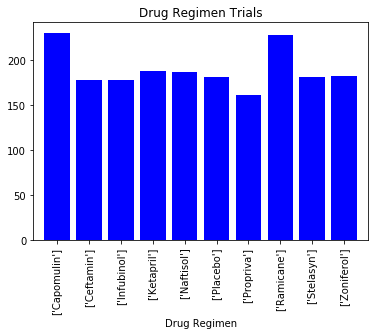

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
y = mergedData["Mouse ID"].count()
x = np.arange(len(y))

plt.bar(x, y, color='b', align="center")
labels = mergedData["Drug Regimen"].unique()

ticks = [value for value in x]
plt.xticks(ticks, labels, rotation = "vertical")
plt.xlim(-0.75, len(x)-0.25)

plt.title("Drug Regimen Trials")
plt.xlabel("Drug Regimen")

## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexes = mouse_metadata.groupby('Sex')
sexCount = sexes["Mouse ID"].count()

mouse_metadata.plot.pie(y=sexCount)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = mouse_metadata.groupby('Sex')
sexCount = sexes["Mouse ID"].count()

labels = sexCount.keys()

plt.pie(sexCount,labels=labels,autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mergedData = pd.merge(mouse_metadata,study_results, on=["Mouse ID"], how="outer")
drugValues = mergedData.loc[mergedData['Drug Regimen'] == 'Capomulin']
mouse = mergedData.loc[mergedData['Mouse ID'] == 'r157']

graph = mouse.plot.line(x='Timepoint',y='Tumor Volume (mm3)',grid=True,figsize=(10,10))
# Set the x-axis label
graph.set_xlabel("Timepoint")

# Set the y-axis label
graph.set_ylabel("Tumor Volume")

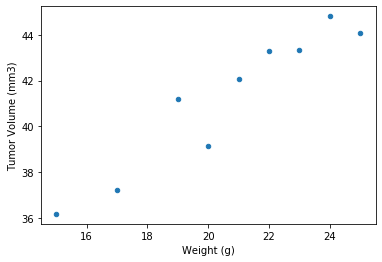

In [7]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin 
mergedData = pd.merge(mouse_metadata,study_results, on=["Mouse ID"], how="outer")
drugValues = mergedData.loc[mergedData['Drug Regimen'] == 'Capomulin']

drugValues = drugValues[["Weight (g)","Tumor Volume (mm3)"]]
drugValues = drugValues.groupby("Weight (g)").mean()
drugValues = drugValues.reset_index()

drugValues.plot.scatter(x="Weight (g)",y="Tumor Volume (mm3)")

In [10]:
# Calculate the correlation coefficient and linear regression model for mouse weight 
#and average tumor volume for the Capomulin regimen

weight = drugValues['Weight (g)']
tumor = drugValues['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor)
print(f"Weight and tumor volume correlation is {round(correlation[0],2)}")

Weight and tumor volume correlation is 0.95


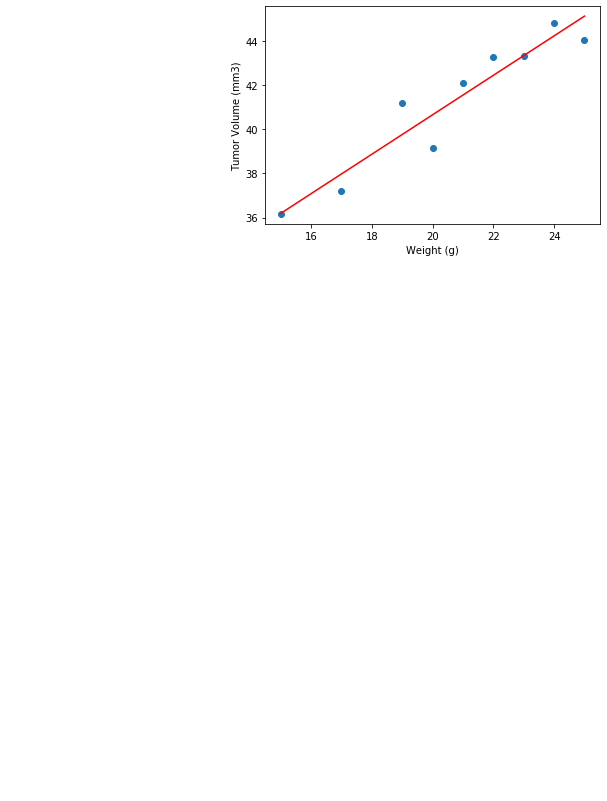

In [14]:
x_values = drugValues['Weight (g)']
y_values = drugValues['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()